In [0]:
# Import libraries for Natural Languge Processing
import re
import spacy
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Activation
import pickle

nltk.download('stopwords')
nltk.download('punkt')

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-v0_8-pastel')
style.use('seaborn-v0_8-pastel')
from PIL import Image
from wordcloud import WordCloud

spacy.cli.download("en_core_web_sm")


# Downloads
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Preprocessing
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 


# Stemming/lemmatizing/vectorizing
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()
# for improved aesthetics
plt.style.use('ggplot')    

# Importing wordcloud for plotting word clouds and 
from wordcloud import WordCloud
# textwrap for wrapping longer text
from textwrap import wrap

import matplotlib.pyplot as plt
print(plt.style.available)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/damacm19.5/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/damacm19.5/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.3 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/damacm19.5/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/damacm19.5/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/damacm19.5/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/damacm19.5/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [1]:
d = pd.read_csv(r"global-warming_rec.csv")
d 

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


In [2]:
d[['message']].describe()

,message
count,15819
unique,14229
top,RT @StephenSchlegel: she's thinking about how ...
freq,307


In [3]:
from sklearn.utils import resample

In [4]:
def remove_RT(d):
    """
        This function removes all the retweeted tweets before resampling so that we do not resample
        from already repeating tweets
    """
    d = d.copy()
    tweets = list(d['message'])
    New_tweets = []
    for tweet in tweets:
        if tweet not in New_tweets:
            New_tweets.append(tweet)
        else:
            New_tweets.append(None)
    d['message'] = New_tweets
    for twee in d['message']:
        if twee is None:
            ind = list(d['message']).index(twee)
            d.drop(d.index[ind], inplace = True)
    return d

In [5]:
def resambling(d):
    """
        The class size is a value between the size of the majority class and the size of the minority class.
        This function resamples by downsampling classes with observations greater than the class size and
        upsampling the classes with observations smaller than the class size.
    """
    d = d.copy()
    d = remove_RT(d)
    class_2 = d[d['sentiment'] == 2]  #upsampling
    class_1 = d[d['sentiment'] == 1]  #majority class
    class_0 = d[d['sentiment'] == 0]  #upsampling
    class_n1 = d[d['sentiment'] == -1]  #minority class
    class_size = int(((len(class_1)-len(class_n1))/2) + len(class_n1))
    #downsampling class 1
    rclass_1 = resample(class_1, replace=False, n_samples=class_size, random_state=27)
    #upsampling class 2
    rclass_2 = resample(class_2, replace=True, n_samples=class_size, random_state=27)
    #upsampling class 0
    rclass_0 = resample(class_0, replace=True, n_samples=class_size, random_state=27)
    #upsampling class -1
    rclass_n1 = resample(class_n1, replace=True, n_samples=class_size, random_state=27)
    dfsampled = pd.concat([rclass_2, rclass_1, rclass_0, rclass_n1])
    
    return dfsampled


In [6]:
df = resambling(d)

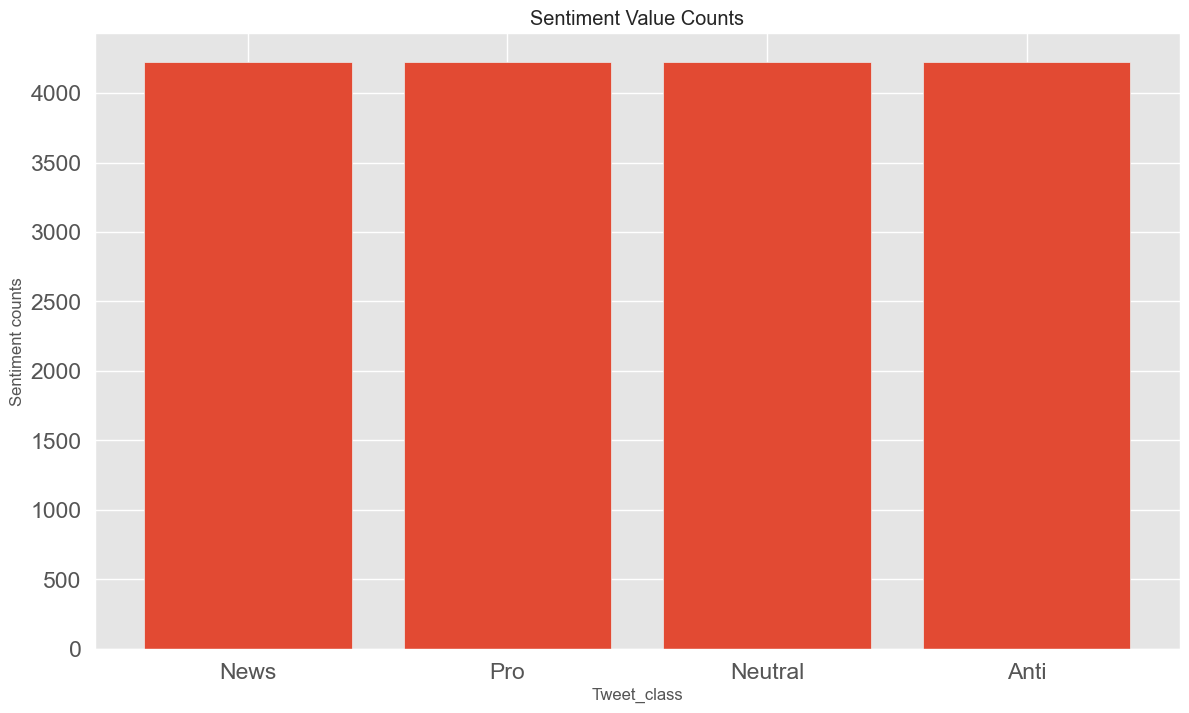

In [7]:
#A bar graph comparing the frequency of each class sentiment in resampled dataframe
news=df[df.sentiment == 2].shape[0]
pro =df[df.sentiment == 1].shape[0]
neutral=df[df.sentiment == 0].shape[0]
anti =df[df.sentiment == -1].shape[0]

#visualization
plt.figure(1,figsize=(14,8))
plt.bar(["News", "Pro", "Neutral" , "Anti"],[news, pro, neutral , anti])
plt.xlabel('Tweet_class')
plt.ylabel('Sentiment counts')
plt.title('Sentiment Value Counts')
plt.show()

In [8]:
#making a copy of the dataframe which allows us to make some changes without changing the original dataframe
df_copy = df.copy()

In [9]:
#using regular expressions to remove tagy symbols
def remove_pattern(input_txt, pattern):
    """
    this function checks for patterns in the input_txt and removes them
    """
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [10]:
df_copy['message'] = np.vectorize(remove_pattern)(df_copy['message'], "@[\w]*") 

In [11]:
def  clean_text(df, text_field):
    """
    this function takes in a dataframe,text field and removes urls from the text field then return a dataframe with urls removed form the text field
    """
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
#test_clean = clean_text(clean_test_df, "message")
df_clean = clean_text(df_copy,"message")

In [12]:
df_clean.head()

,sentiment,message,tweetid
4492,2,australias recordbreaking summer heat linked...,409564
11502,2,worlds mountains threatened by global warming ...,120169
3088,2,what 500yearold clams can tell us about clim...,764169
5739,2,govt investment in climate change paying off s...,409701
13810,2,saudi arabia will stick to climate change pl...,367403


In [13]:
df_clean.to_csv('df_clean.csv', index=False)

In [14]:
import string

In [15]:
# Sample text cleaning function
def clean_text(text):
    # Add spaces between words where needed
    text = re.sub(r"(\d+)([a-zA-Z]+)", r"\1 \2", text)  # Add space after numbers
    text = re.sub(r"([a-zA-Z]+)(\d+)", r"\1 \2", text)  # Add space before numbers

    # Convert text to lowercase
    text = text.lower()

    # Remove unnecessary characters or punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text

# Assuming df is your existing DataFrame and 'text_column' is the column to clean
df_clean['message'] = df_clean['message'].apply(clean_text)

In [16]:
#A function that removes punctuations
def remove_punctuations(text):
    table = str.maketrans("","",string.punctuation)
    txt = text.translate(table)
    return txt
#removing punctuationd from the message column
df_clean["message"] = df_clean['message'].apply(remove_punctuations)

In [17]:
# stop = set(stopwords.words('english'))

# #A function that removes stop words 
# def remove_stopwords(text):
#     text = [word.lower() for word in text.split() if word.lower() not in stop]
#     r = " ".join(text)
#     return r
# #removing stop words from the message column
# df_clean["message"]=df_clean["message"].apply(remove_stopwords)
# #visualing the cleaned dataframe
# df_clean.head()

In [18]:
# Mapping dictionary
sentiment_map = {-1: 'Agnostic', 0: 'Neutral', 1: 'Believer', 2: 'News'}

# Creating a new DataFrame with the mapped sentiment values
df_mapped = df_clean.copy()
df_mapped['sentiment'] = df_mapped['sentiment'].map(sentiment_map)

print("\nNew DataFrame with Mapped Sentiments:")
df_mapped.head()



New DataFrame with Mapped Sentiments:


,sentiment,message,tweetid
4492,News,australias recordbreaking summer heat linked...,409564
11502,News,worlds mountains threatened by global warming ...,120169
3088,News,what 500 yearold clams can tell us about cli...,764169
5739,News,govt investment in climate change paying off s...,409701
13810,News,saudi arabia will stick to climate change pl...,367403


In [19]:
df_mapped.to_csv('df_clean3.csv', index=False)

In [20]:
# Ensure full message display
pd.set_option('display.max_colwidth', None)

# Example: View a specific row by index
index_to_view = 2
print(df_clean[["message", "sentiment"]].iloc[index_to_view] if index_to_view < len(df_clean) else f"Index {index_to_view} is out of bounds.")



message        what 500 yearold clams can tell us about climate change  
sentiment                                                              2
Name: 3088, dtype: object


In [21]:
df_clean[["message", "sentiment"]]

,message,sentiment
4492,australias recordbreaking summer heat linked directly to climate change,2
11502,worlds mountains threatened by global warming climate news network climate environment,2
3088,what 500 yearold clams can tell us about climate change,2
5739,govt investment in climate change paying off say reports climatechange,2
13810,saudi arabia will stick to climate change pledges,2
...,...,...
12124,pope francis decries climate changeumm you might want to take this up with godbeen changing since creationhtt,-1
7522,has tripled global warming since the year 2000 during a time when satellites show no temperature increase,-1
7887,maga white house calls climate change funding a waste of your money video see here,-1
8772,if those of us who speak climate truth are climate deniers doesnt that make the climate change scammers climat,-1


In [22]:
df_clean["sentiment"].value_counts().sort_index()

sentiment
-1    4221
 0    4221
 1    4221
 2    4221
Name: count, dtype: int64

In [23]:
# Map sentiment values from [-1, 0, 1, 2] to [0, 1, 2, 3]
sentiment_mapping = {-1: 0, 0: 1, 1: 2, 2: 3}
df_clean['sentiment'] = df_clean['sentiment'].map(sentiment_mapping)

# Verify mapping
print("Mapped Sentiment Values:")
print(df_clean['sentiment'].value_counts())

Mapped Sentiment Values:
sentiment
3    4221
2    4221
1    4221
0    4221
Name: count, dtype: int64


In [24]:
# Split the data
X = df_clean['message']
y = df_clean['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify train and test splits
print("Train Sentiment Distribution:")
print(y_train.value_counts())
print("Test Sentiment Distribution:")
print(y_test.value_counts())

Train Sentiment Distribution:
sentiment
0    3401
3    3390
2    3372
1    3344
Name: count, dtype: int64
Test Sentiment Distribution:
sentiment
1    877
2    849
3    831
0    820
Name: count, dtype: int64


In [25]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(x) for x in X_train_seq)

In [26]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [27]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4))  # 4 classes: 0, 1, 2, 3
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Save the model in the .h5 format
model.save('sentiment_lstm_model.h5')


Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


338/338 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.3519 - loss: 1.2823 - val_accuracy: 0.5307 - val_loss: 0.9952
Epoch 2/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6315 - loss: 0.8554 - val_accuracy: 0.7024 - val_loss: 0.7364
Epoch 3/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8143 - loss: 0.5260 - val_accuracy: 0.7731 - val_loss: 0.6753
Epoch 4/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9045 - loss: 0.3240 - val_accuracy: 0.7905 - val_loss: 0.7032
Epoch 5/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9373 - loss: 0.2225 - val_accuracy: 0.7905 - val_loss: 0.7314
Epoch 6/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9612 - loss: 0.1507 - val_accuracy: 0.8101 - val_loss: 0.7246
Epoch 7/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9701 - loss: 0.1150 - val_accuracy: 0.8194 - val_loss: 0.7339
Epoch 8/10
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9768 - loss: 0.0921 - val_accuracy: 0.814

Test Accuracy: 0.8131


In [28]:
# Save the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save max_length for use in the Streamlit app
with open('max_length.pkl', 'wb') as handle:
    pickle.dump(max_length, handle)